In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [114]:
df=pd.read_csv("heart.csv")
print(df.describe())
print(df.info())
print(df.isnull().sum())

              age         sex  chest_pain_type  resting_blood_pressure  \
count  400.000000  400.000000       400.000000              400.000000   
mean    53.667500    0.662500         1.712500              123.630000   
std      8.508403    0.473449         1.035628               16.567114   
min     29.000000    0.000000         0.000000               94.000000   
25%     48.000000    0.000000         1.000000              112.000000   
50%     54.000000    1.000000         2.000000              124.000000   
75%     59.000000    1.000000         3.000000              135.000000   
max     77.000000    1.000000         3.000000              174.000000   

       cholesterol  fasting_blood_sugar  resting_ecg  max_heart_rate  \
count   400.000000           400.000000   400.000000      400.000000   
mean    216.627500             0.140000     0.530000      146.717500   
std      41.379941             0.347422     0.533678       21.104293   
min     126.000000             0.000000     0

In [115]:
feature_cols=df.columns.tolist()
print(feature_cols)

['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'heart_disease']


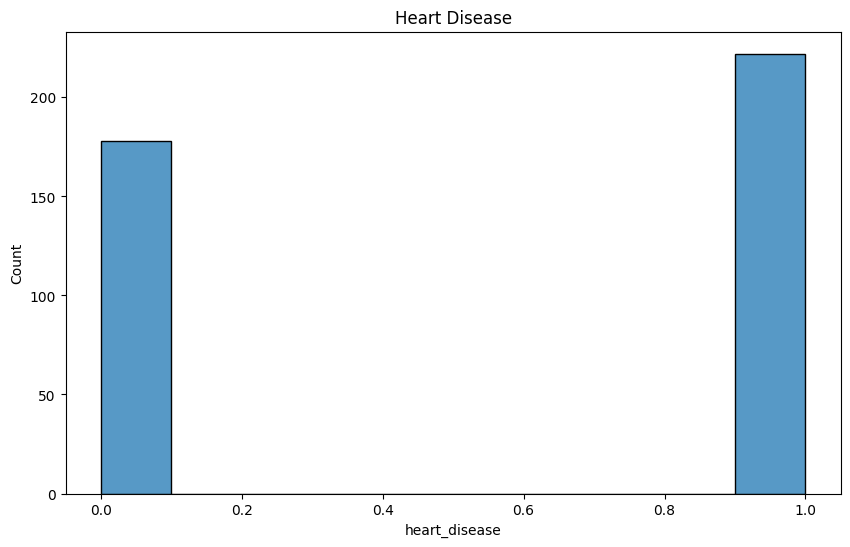

In [116]:
plt.figure(figsize=(10,6))
sns.histplot(df['heart_disease'])
plt.title('Heart Disease')
plt.show()

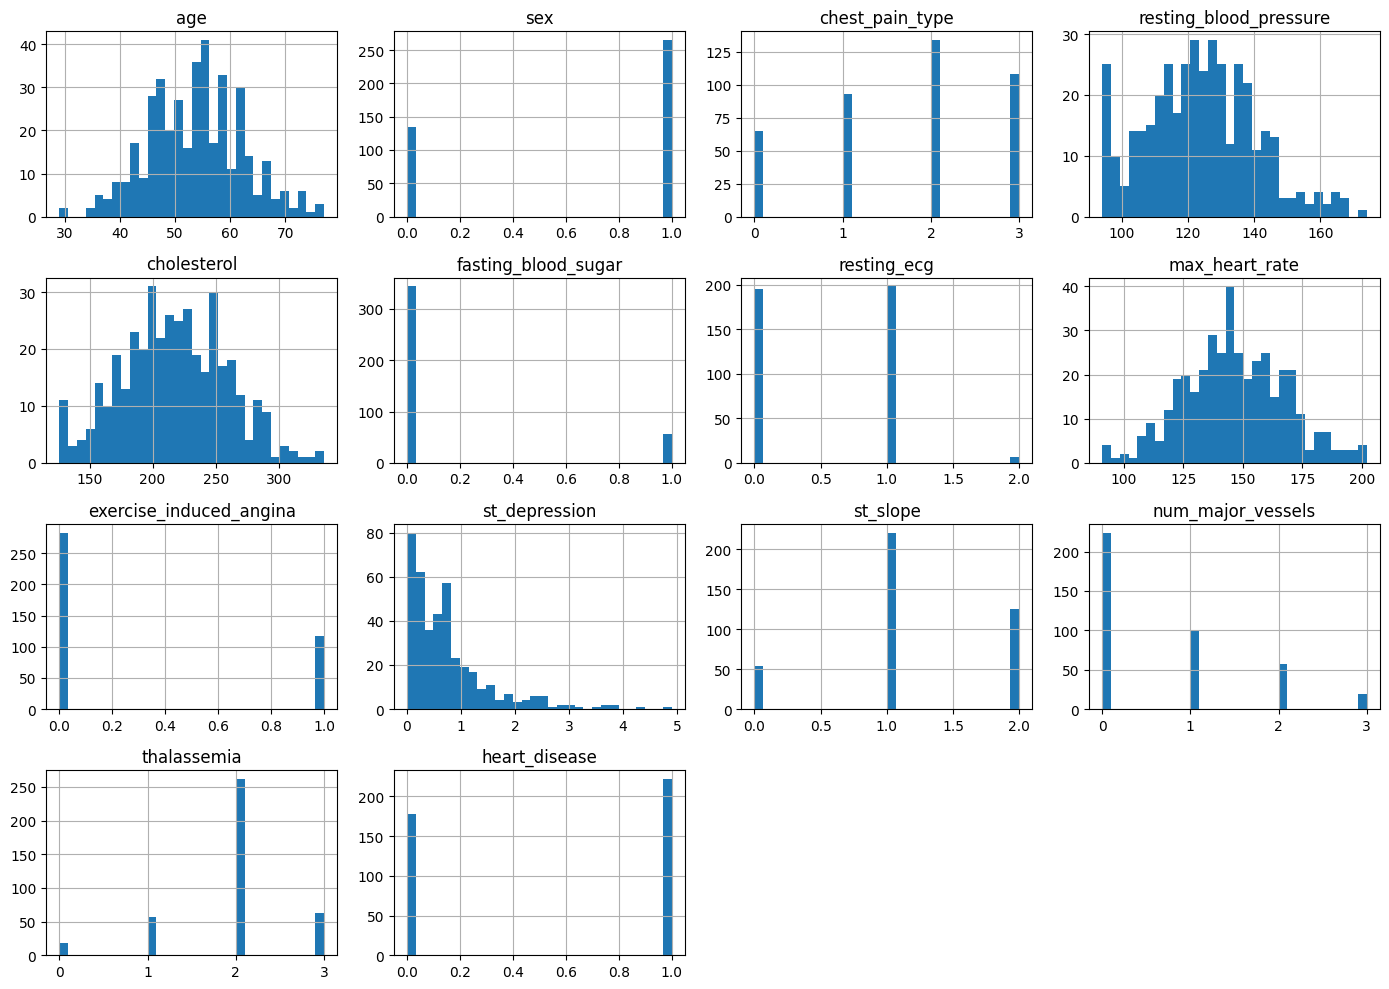

In [117]:
#X=df.drop('heart_disease',axis=1)
#y=df['heart_disease']

df.hist(bins=30, figsize=(14, 10))
plt.tight_layout()
plt.show()

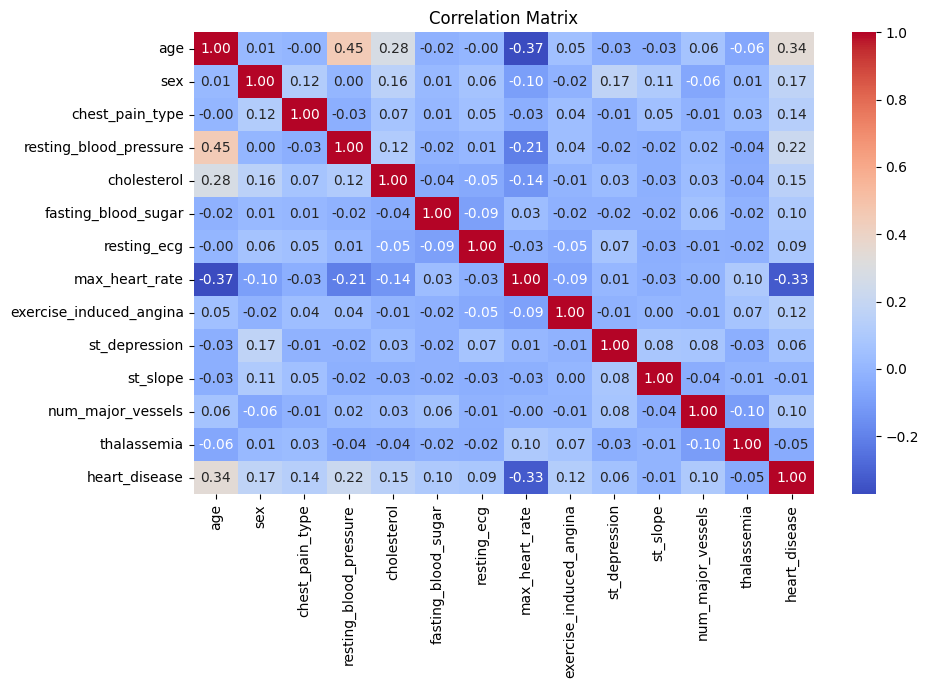

heart_disease              1.000000
age                        0.341464
resting_blood_pressure     0.217725
sex                        0.169419
cholesterol                0.147854
chest_pain_type            0.135328
exercise_induced_angina    0.122360
fasting_blood_sugar        0.100324
num_major_vessels          0.099679
resting_ecg                0.088150
st_depression              0.061122
st_slope                  -0.010958
thalassemia               -0.046380
max_heart_rate            -0.327515
Name: heart_disease, dtype: float64


In [118]:
plt.figure(figsize=(10,6))
numeric_df=df.select_dtypes(include=['number'])
corr=numeric_df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
target_corr = corr['heart_disease'].sort_values(ascending=False)
print(target_corr)



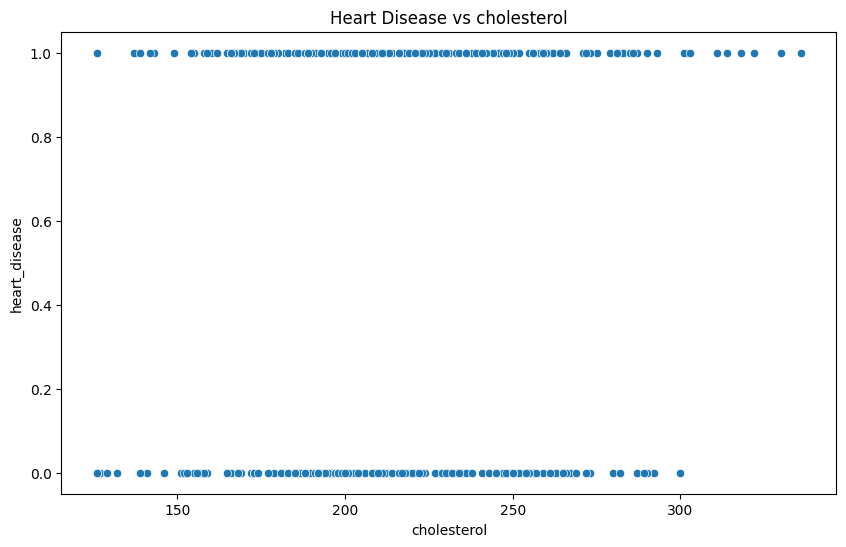

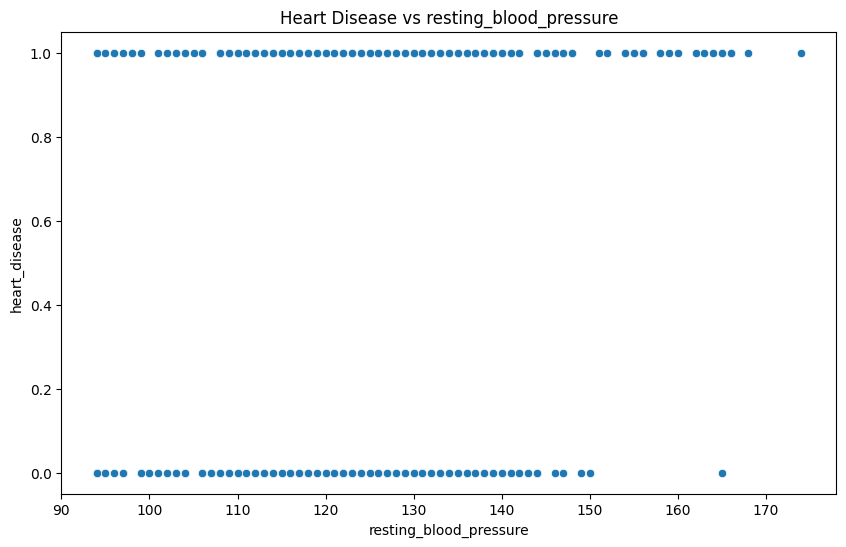

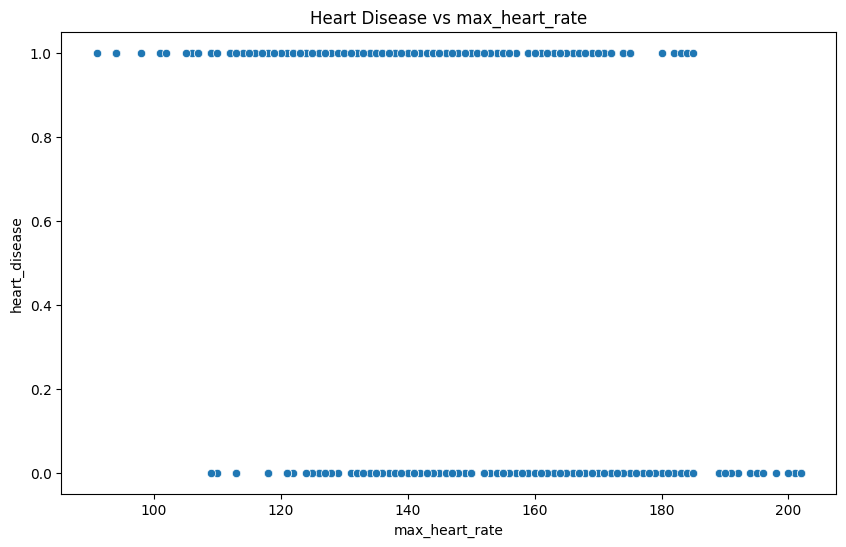

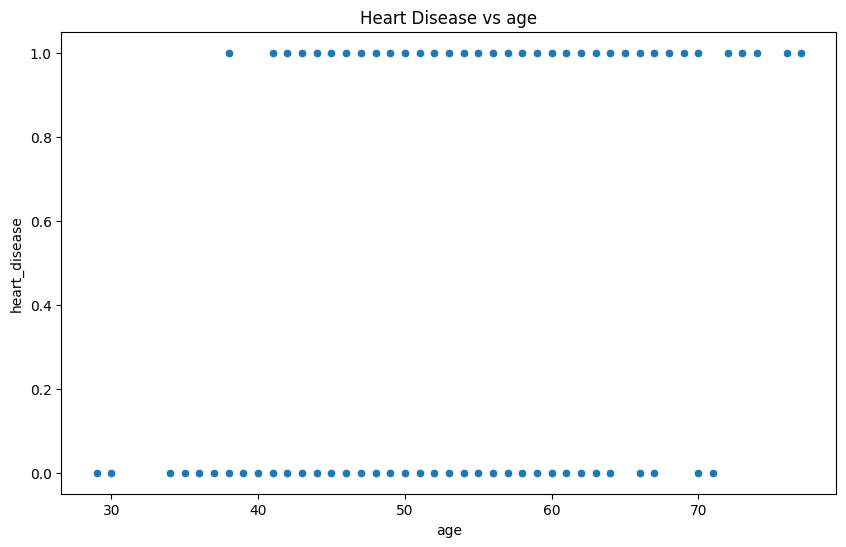

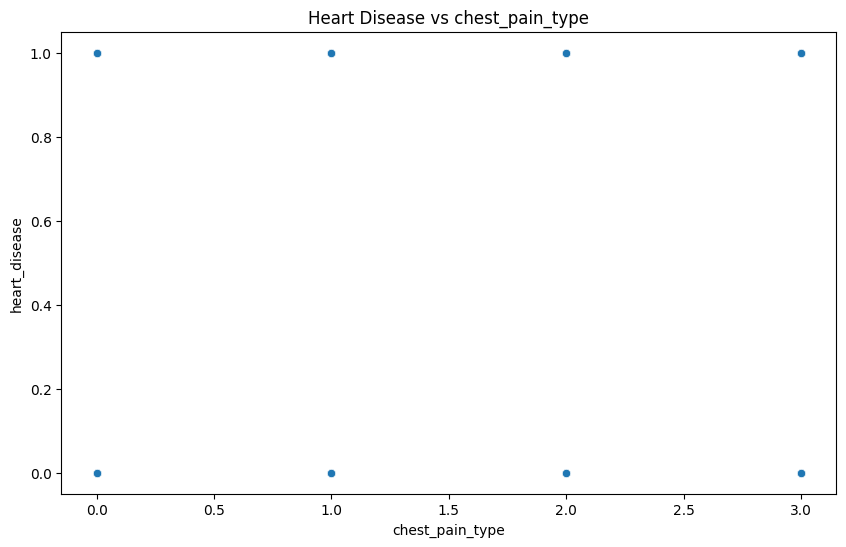

In [119]:
key_features=['cholesterol','resting_blood_pressure','max_heart_rate','age','chest_pain_type']
for features in key_features:
  plt.figure(figsize=(10,6))
  sns.scatterplot(x=df[features],y=df['heart_disease'])
  plt.title(f'Heart Disease vs {features}')
  plt.show()

In [120]:
'''
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] >= (Q1 - 1.5 * IQR)) & (df[column] <= (Q3 + 1.5 * IQR))]

columns_to_check = ['chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'heart_disease']
for col in columns_to_check:
    df = remove_outliers_iqr(df, col)
'''
X=df.drop('heart_disease',axis=1)
y=df['heart_disease']

In [121]:
scale=StandardScaler()
X_scaled=scale.fit_transform(X)
print(X_scaled)
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

model=LogisticRegression()

'''
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42,
    class_weight="balanced"
)
'''
'''
from sklearn.svm import SVC
model = SVC( kernel="rbf",
        probability=True,
        C=1.0,
        gamma="scale",
        random_state=42)
'''
'''
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(
    criterion="gini",
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42,
    class_weight="balanced"
)
'''
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)



[[ 0.50984017  0.71374643 -0.68885005 ... -0.27520413  0.36318725
   0.1088931 ]
 [-0.19622816 -1.4010578   0.27795704 ... -1.82564996 -0.76297476
   1.56080112]
 [ 0.62751823 -1.4010578   0.27795704 ... -0.27520413 -0.76297476
  -1.34301492]
 ...
 [ 1.45126462  0.71374643 -0.68885005 ... -0.27520413 -0.76297476
   0.1088931 ]
 [-0.19622816  0.71374643  1.24476412 ... -0.27520413 -0.76297476
  -2.79492293]
 [ 1.33358656 -1.4010578  -0.68885005 ... -0.27520413 -0.76297476
   0.1088931 ]]


In [122]:
def evaluation_metrics(y_true,y_pred,label="test"):
  print(f"{label} Accuracy: {accuracy_score(y_true,y_pred)}")
  print(f"{label} Precision: {precision_score(y_true,y_pred)}")
  print(f"{label} Recall: {recall_score(y_true,y_pred)}")
  print(f"{label} F1 Score: {f1_score(y_true,y_pred)}")
  print(f"{label} ROC AUC Score: {roc_auc_score(y_true,y_pred)}\n")

evaluation_metrics(y_train,y_pred_train,"Train")
evaluation_metrics(y_test,y_pred_test,"Test")

Train Accuracy: 0.721875
Train Precision: 0.7430167597765364
Train Recall: 0.7556818181818182
Train F1 Score: 0.7492957746478873
Train ROC AUC Score: 0.718118686868687

Test Accuracy: 0.7
Test Precision: 0.7894736842105263
Test Recall: 0.6521739130434783
Test F1 Score: 0.7142857142857143
Test ROC AUC Score: 0.7084398976982097



In [123]:
import pickle

# Save model
with open('Heart_Disease_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model saved as Heart_Disease_model.pkl")

with open("scaler.pkl", "wb") as f:
    pickle.dump(scale,f)

print("Model saved as scaler.pkl.pkl")

with open("feature_columns.json", "w") as f:
    import json
    json.dump(feature_cols,f)

Model saved as Heart_Disease_model.pkl
Model saved as scaler.pkl.pkl
